### Data exploratory task description:
- Identify quality issues (e.g. missing values, wrong measurements, …)
- Assess feature quality – how relevant is a certain measurement (e.g. use correlation matrix)
- Get an idea on the value distribution of your data using statistical measures and visualizations

# 1. Description of the dataset

The dataset contains 272 images in jpg format. The image size is 512 x 512 px with the following structure:

- Test_set
- Training_set
- Validation_set

The total number of images for
•	the training set is 200 images, 
•	the test set is 48 images,
•	the validation set is 12 images.

In each dataset there are images collected into 4 different folders/classes: 

- dry
- esca
- healthy
- mite

The total number of images is the same for each class per dataset.

The dataset is available: https://github.com/RenataUjhaziova/datasetWS_DvsEvsHvsM_512-512_git


# 2. Business Problem

The Vineyard owners would like to use machine learning algorithms to classify images with grape leaves into 4 classes: 
- dry
- esca
- healthy
- mite

Using image classification with machine instead of the manual identification of grape leaves with diseases the Vineyard owners can save time and take action imadiatelly in a right place.

# 3. Analytics Objective

Classify images into 4 classes: dry, esca, healthy and mite using 
- different classification models such as KNN, XGBoost and ANN,
- deep learning CNN model for image classification.

# 4. Load and explore the data

In [1]:
# install libraries
#!pip install pandas
#!pip install numpy
#!pip install matplotlib.pyplot
#!pip install seaborn

In [2]:
!pip install opencv-python 

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [3]:
# import libraries
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In this section, we will load the data into a pandas dataframe and perform an exploratory data analysis (EDA).

In [4]:
!rm -Rf datasetWS_DvsEvsHvsM_512-512_git

In [5]:
!git clone https://github.com/RenataUjhaziova/datasetWS_DvsEvsHvsM_512-512_git.git

Cloning into 'datasetWS_DvsEvsHvsM_512-512_git'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (292/292), done.
remote: Compressing objects: 100% (290/290), done.
remote: Total 292 (delta 0), reused 289 (delta 0), pack-reused 0
Receiving objects: 100% (292/292), 49.26 MiB | 41.84 MiB/s, done.


In [6]:
%cd ./datasetWS_DvsEvsHvsM_512-512_git/

/home/dsxuser/work/datasetWS_DvsEvsHvsM_512-512_git


## 4.1 Load images

In [7]:
# read images
def read_images(path):
    print('Reading from', path)
    files = [file for file in os.listdir(path)]
    image = cv2.imread(path+files[0], 1)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images = np.zeros(shape=(len(files), 512, 512, image_rgb.shape[2]))
    for i in range(len(files)):
        image = cv2.imread(path+files[i], 1) 
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_rgb = image_rgb.astype('float32') / 255.0
        images[i,:,:,:] = cv2.resize(image_rgb,(512,512))
    return images

In [8]:
healthy_train = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/training_set/healthy/')
esca_train = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/training_set/esca/')
dry_train = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/training_set/dry/')
mite_train = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/training_set/mite/')

Reading from ../datasetWS_DvsEvsHvsM_512-512_git/training_set/healthy/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/training_set/esca/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/training_set/dry/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/training_set/mite/


In [9]:
healthy_test = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/test_set/healthy/')
esca_test = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/test_set/esca/')
dry_test = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/test_set/dry/')
mite_test = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/test_set/mite/')

Reading from ../datasetWS_DvsEvsHvsM_512-512_git/test_set/healthy/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/test_set/esca/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/test_set/dry/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/test_set/mite/


In [10]:
healthy_test[0]

array([[[ 0.61960787,  0.73333335,  0.47450981],
        [ 0.65098041,  0.7647059 ,  0.51372552],
        [ 0.66274512,  0.78039217,  0.53725493],
        ..., 
        [ 0.36078432,  0.52549022,  0.1254902 ],
        [ 0.33333334,  0.50588238,  0.12156863],
        [ 0.36078432,  0.52941179,  0.16862746]],

       [[ 0.67450982,  0.78823531,  0.52549022],
        [ 0.7019608 ,  0.82352942,  0.56078434],
        [ 0.6901961 ,  0.80784315,  0.57254905],
        ..., 
        [ 0.3882353 ,  0.56470591,  0.16078432],
        [ 0.38039216,  0.5529412 ,  0.16862746],
        [ 0.3882353 ,  0.56078434,  0.18039216]],

       [[ 0.68235296,  0.80000001,  0.52549022],
        [ 0.66274512,  0.78431374,  0.52156866],
        [ 0.66274512,  0.77254903,  0.54509807],
        ..., 
        [ 0.43529412,  0.61960787,  0.21960784],
        [ 0.41960785,  0.60392159,  0.20392157],
        [ 0.39607844,  0.58039218,  0.17254902]],

       ..., 
       [[ 0.41568628,  0.60784316,  0.10588235],
        

## 4.2 Display selected images

In [11]:
# show images
def show_images(path, title=''):
    files = [file for file in os.listdir(path)]          
    image = cv2.imread(path+files[0])
    fig = plt.figure(figsize=(6,6))
    columns = 2
    rows = 2
    for i in range(1, columns*rows + 1):
        image = cv2.imread(path+files[i]) 
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        fig.add_subplot(rows, columns, i)
        plt.imshow(image_rgb)          
    plt.suptitle(title)
    plt.show()

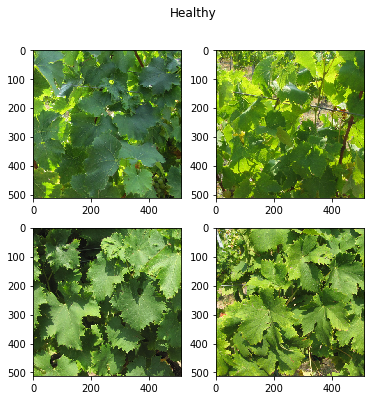

In [12]:
healthy_images = show_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/training_set/healthy/', title='Healthy')

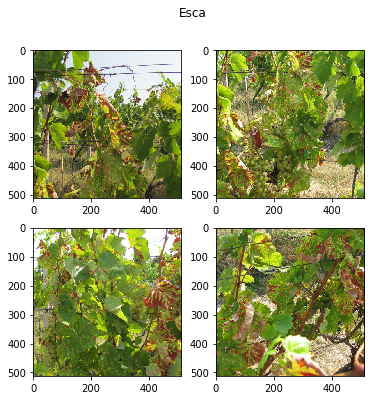

In [13]:
esca_images = show_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/training_set/esca/', title='Esca')

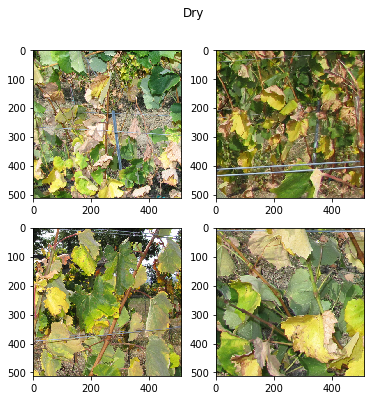

In [14]:
dry_images = show_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/training_set/dry/', title='Dry')

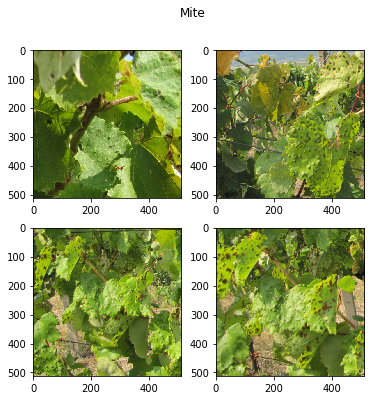

In [15]:
mite_images = show_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/training_set/mite/', title='Mite')

## 4.3 Color segmentation of the images from train set for different classes.

In [16]:
def plot_color_histogram(path, title=''):
    images = []
    path= path

    for image in os.listdir(path):
        images.append(image)

    for image in images:
        img = cv2.imread("%s%s"%(path, image))    # Load the image 
        channels = cv2.split(img)       # Set the image channels
        colors = ("b", "g", "r")        # Initialize tuple 
        plt.figure()    
        plt.title(title)
        plt.xlabel("Bins")
        plt.ylabel("Number of Pixels")
    
        for (i, col) in zip(channels, colors):       # Loop over the image channels
            hist = cv2.calcHist([i], [0], None, [256], [0, 256])   # Create a histogram for current channel            
            plt.plot(hist, color = col)      # Plot the histogram
            plt.xlim([0, 256])

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


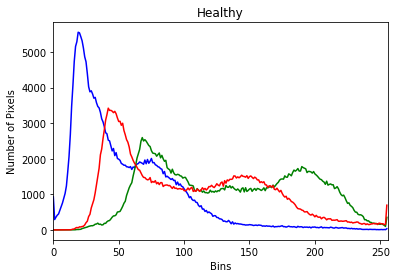

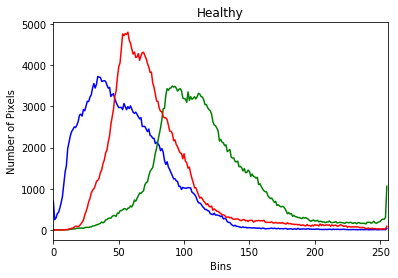

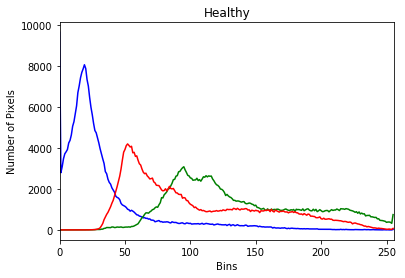

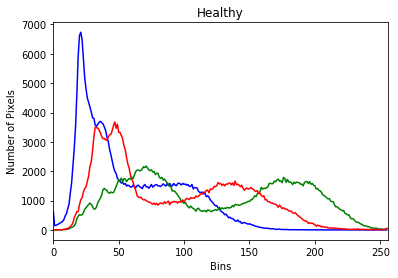

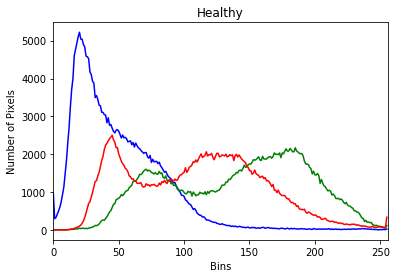

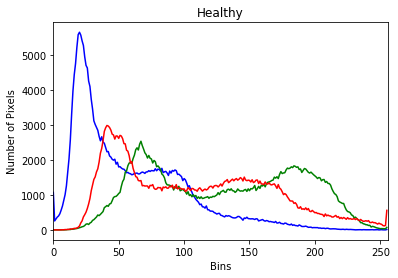

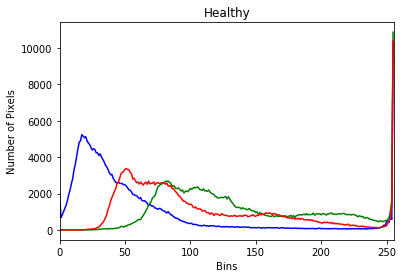

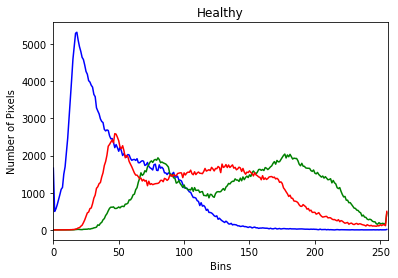

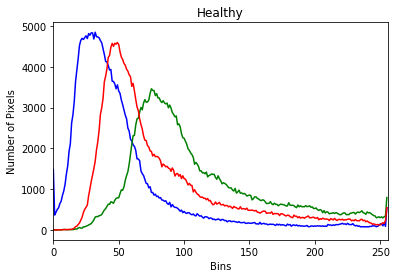

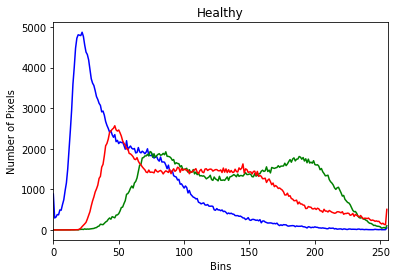

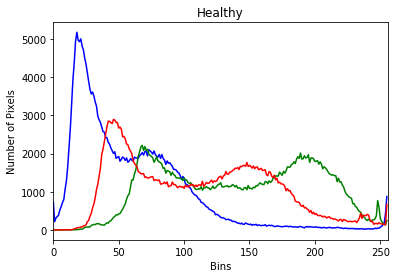

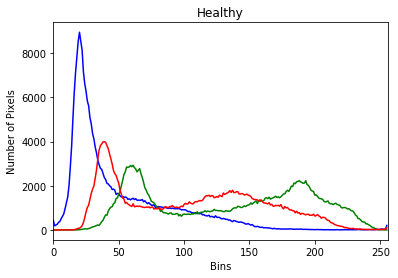

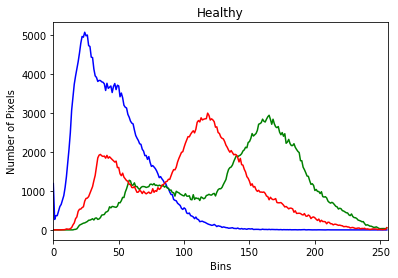

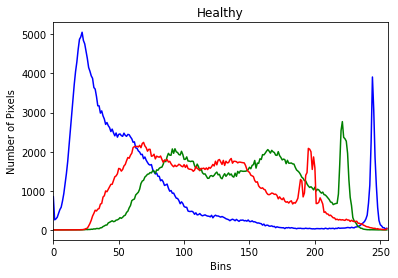

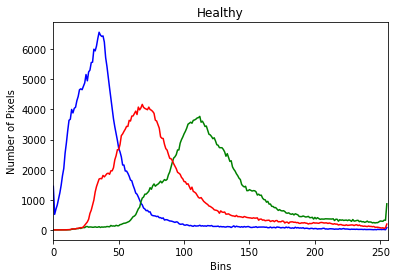

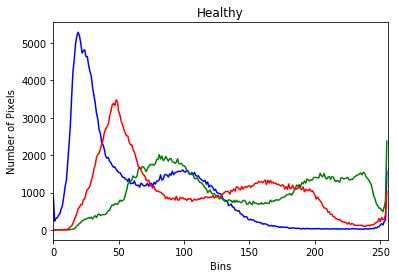

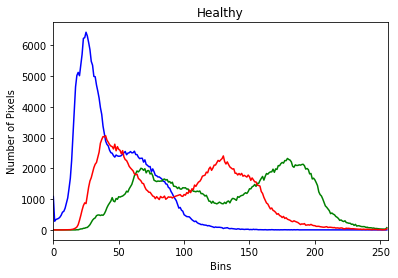

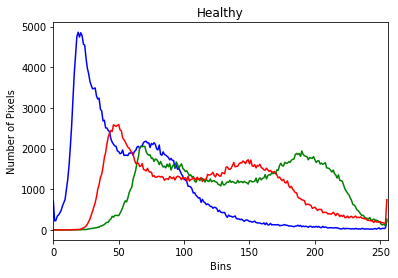

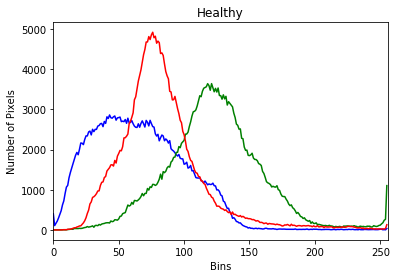

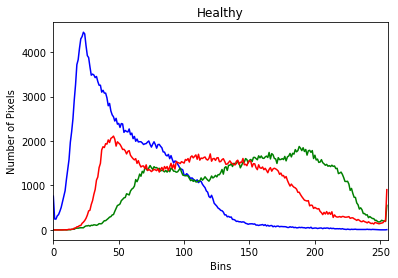

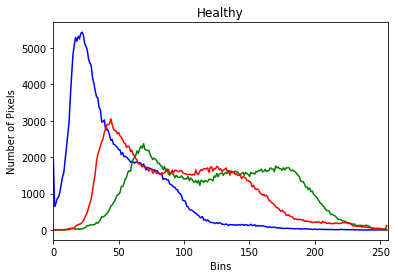

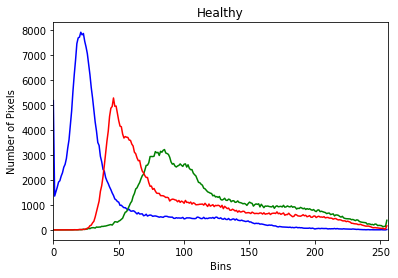

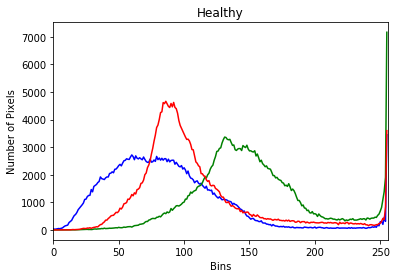

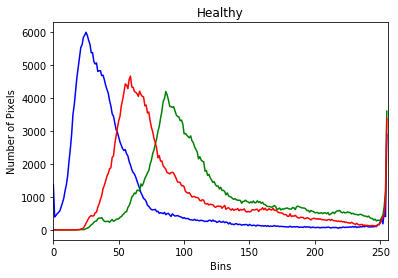

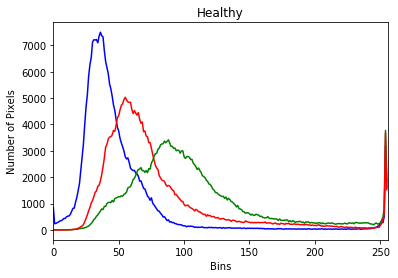

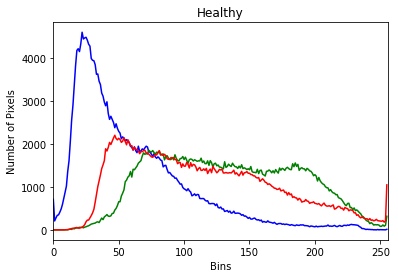

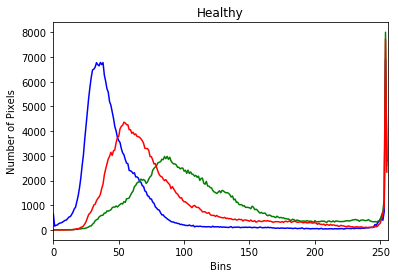

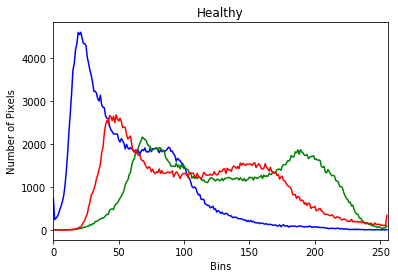

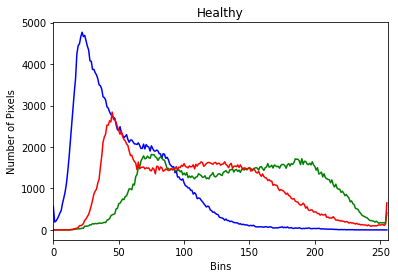

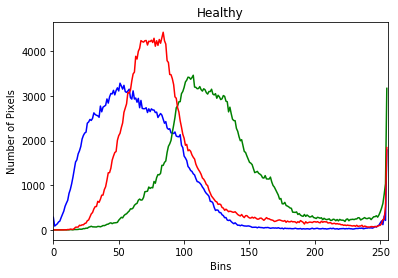

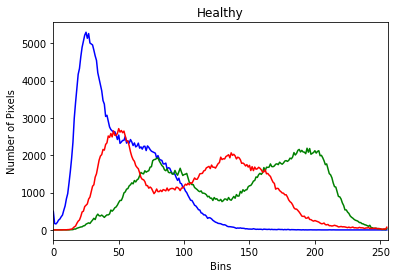

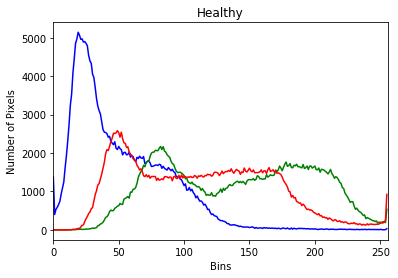

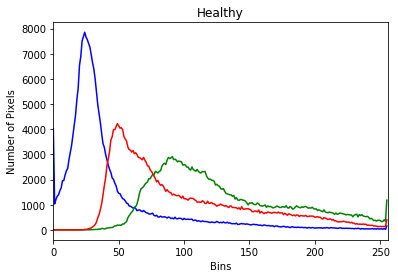

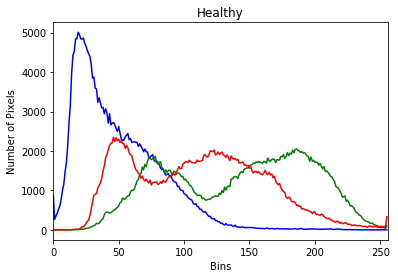

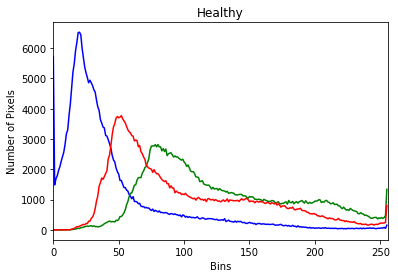

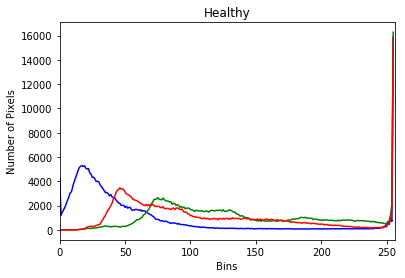

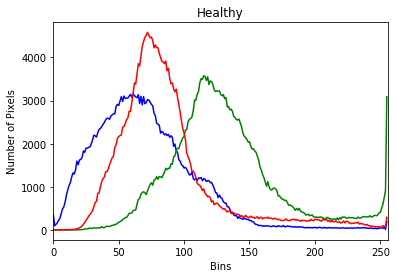

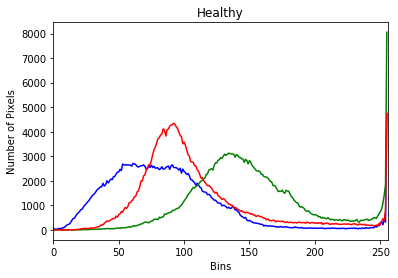

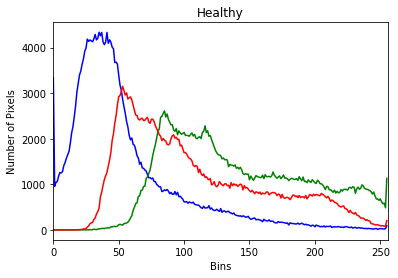

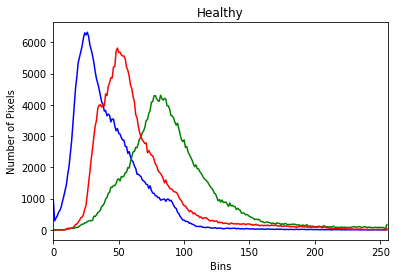

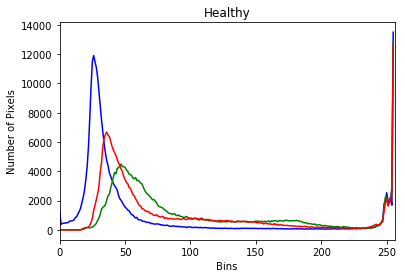

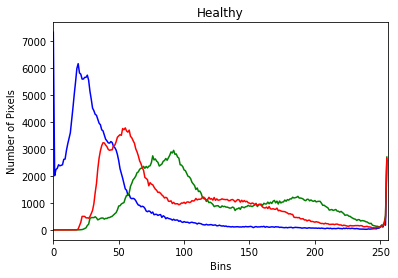

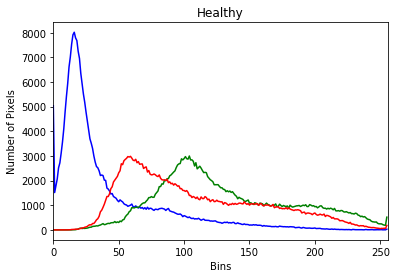

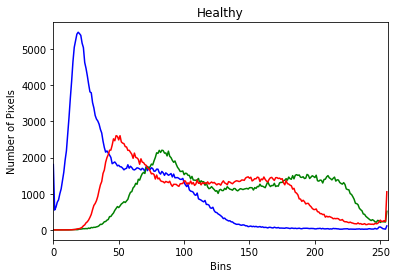

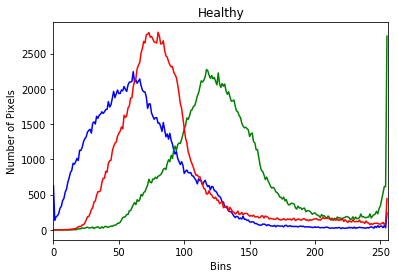

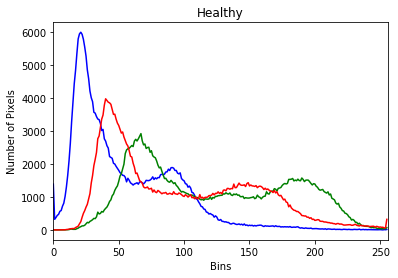

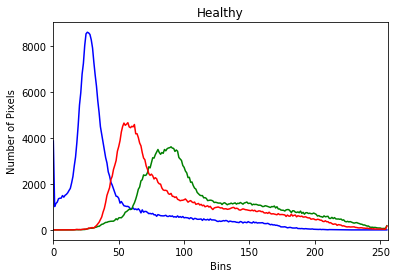

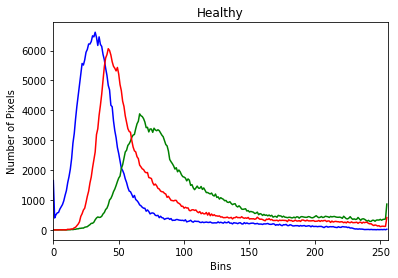

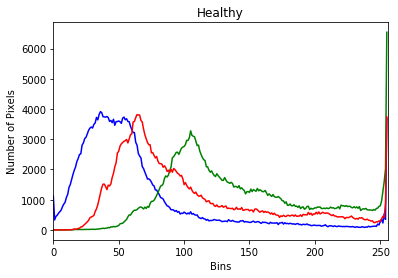

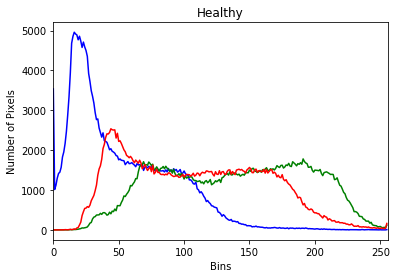

In [17]:
healthy_images_hist = plot_color_histogram(path= '../datasetWS_DvsEvsHvsM_512-512_git/training_set/healthy/', title='Healthy')

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


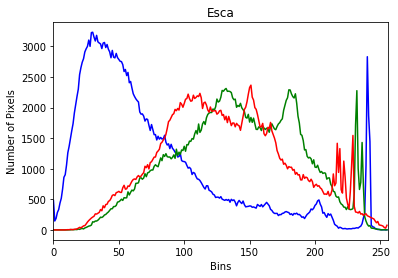

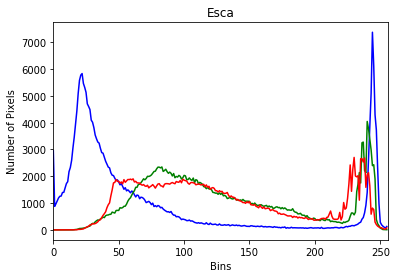

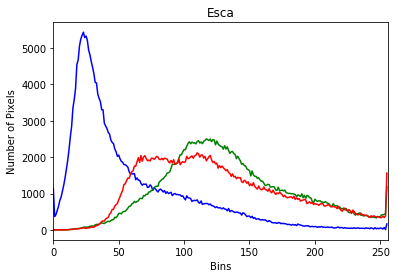

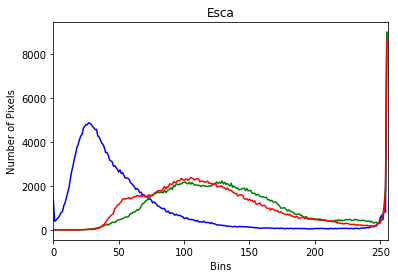

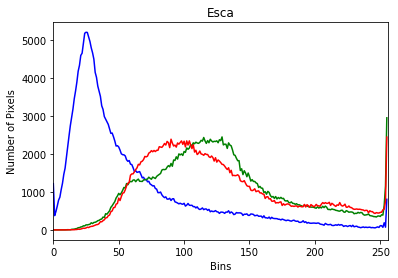

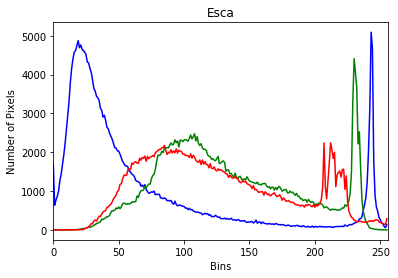

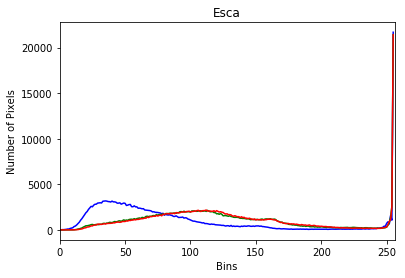

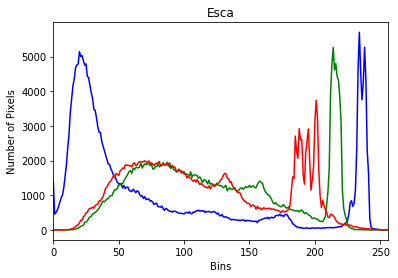

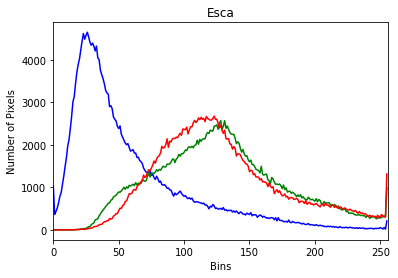

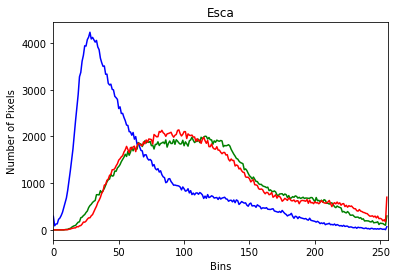

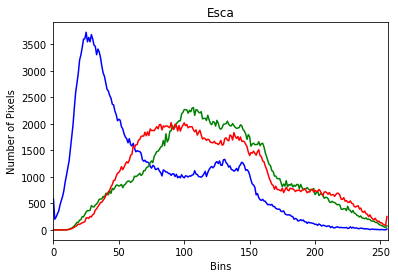

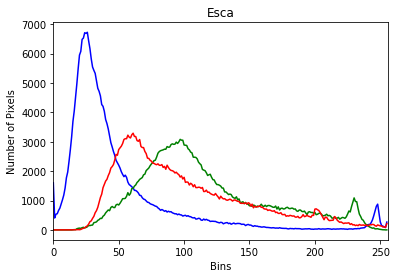

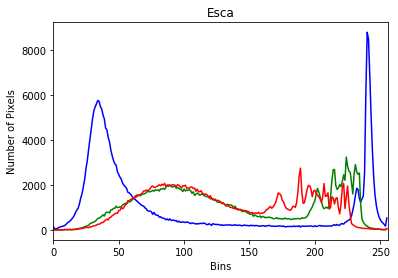

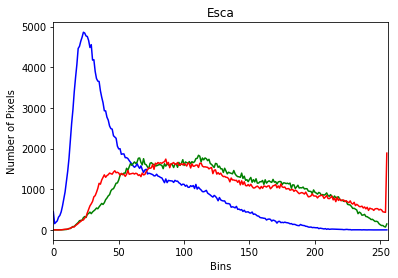

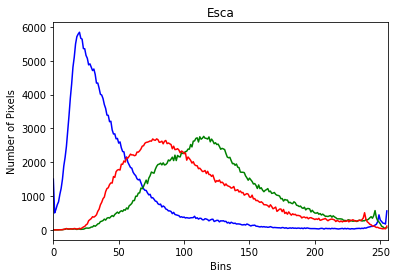

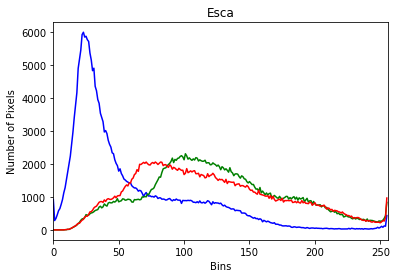

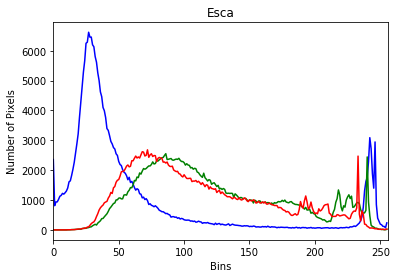

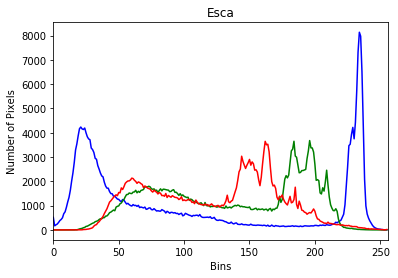

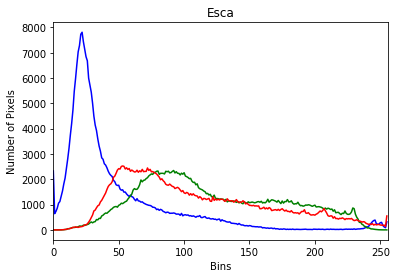

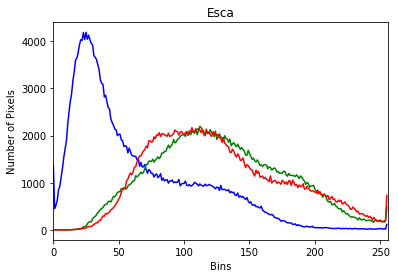

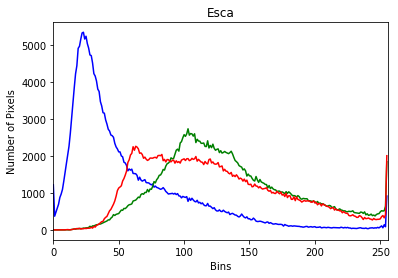

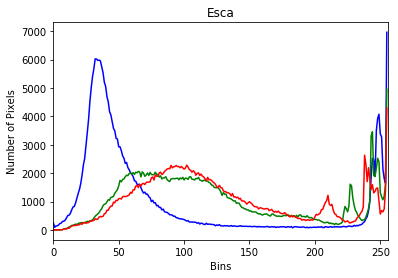

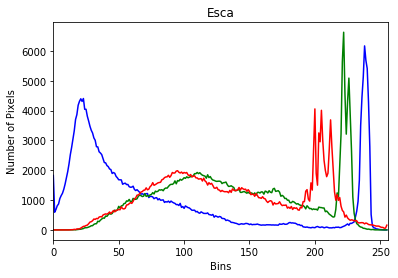

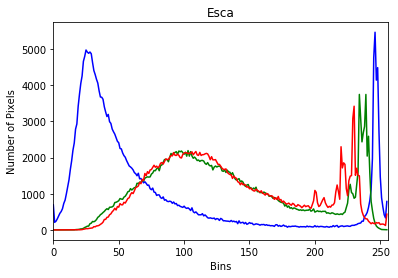

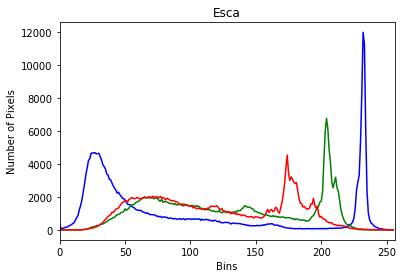

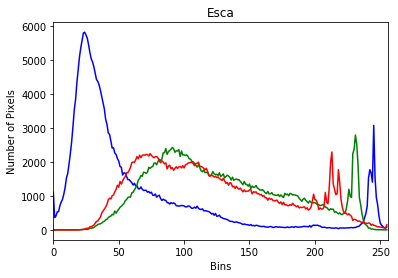

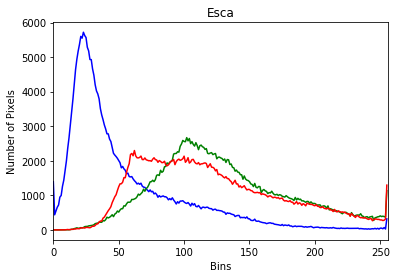

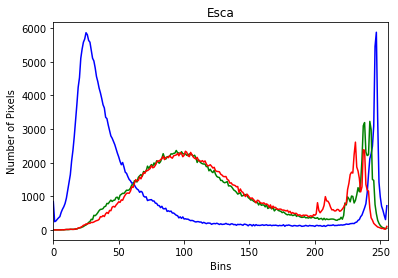

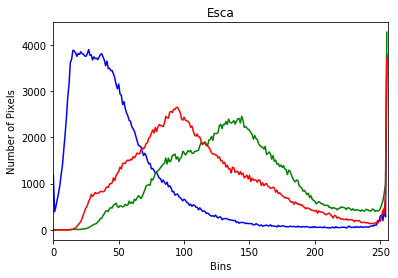

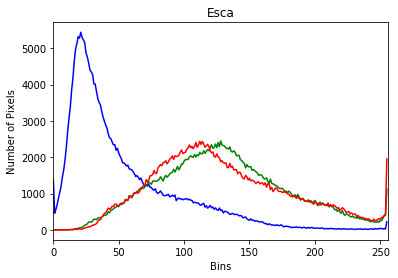

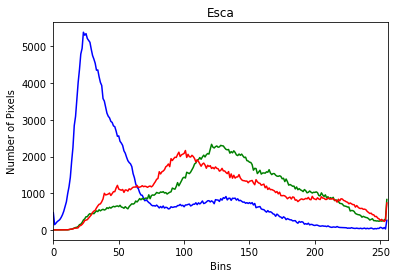

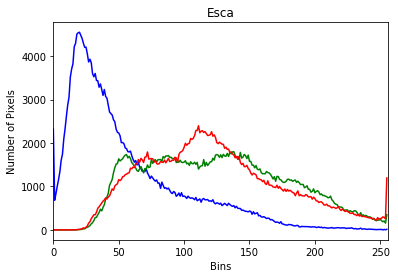

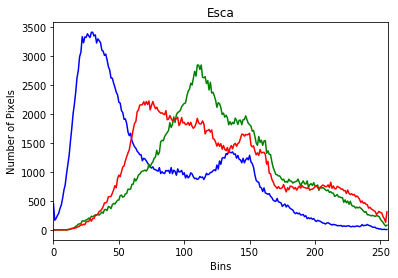

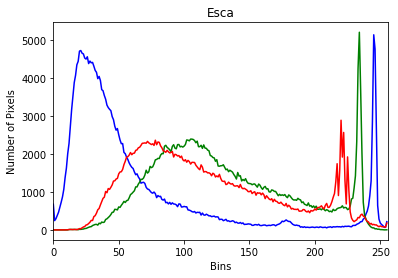

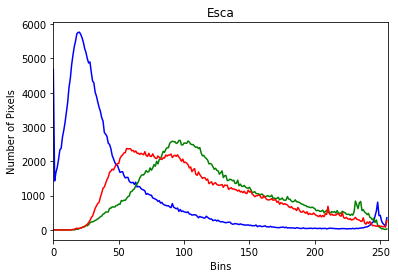

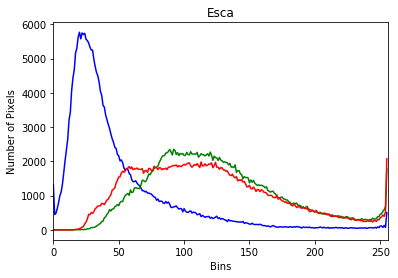

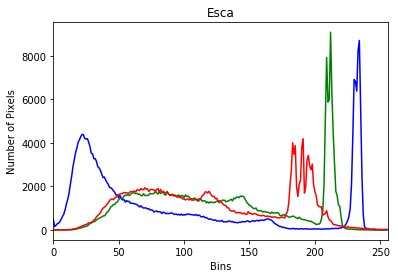

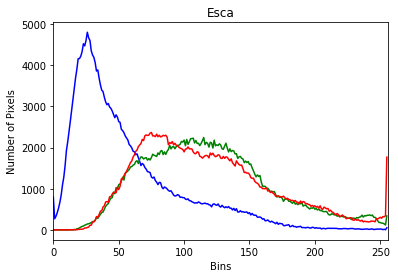

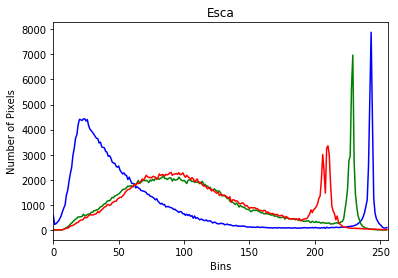

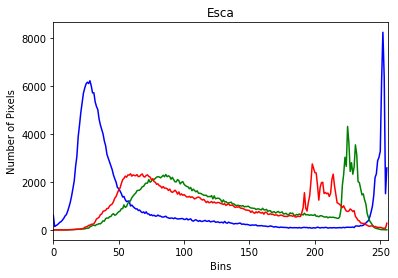

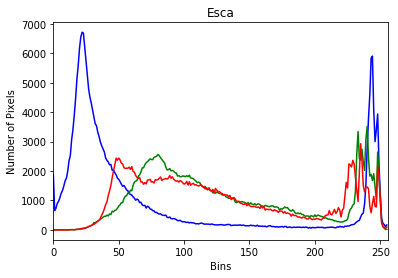

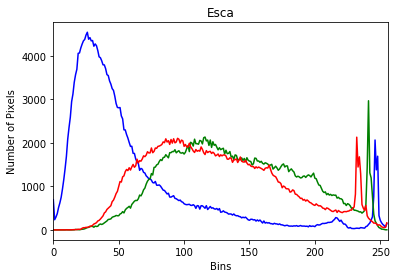

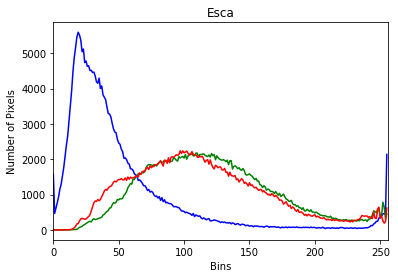

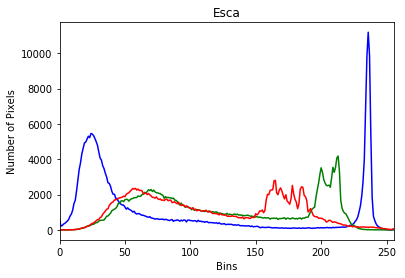

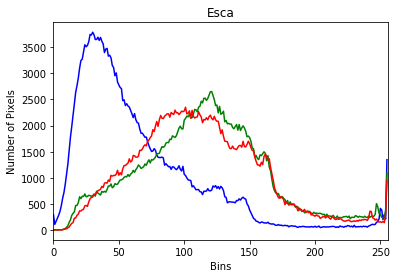

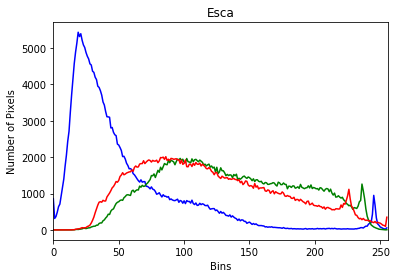

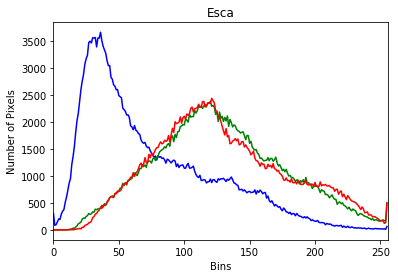

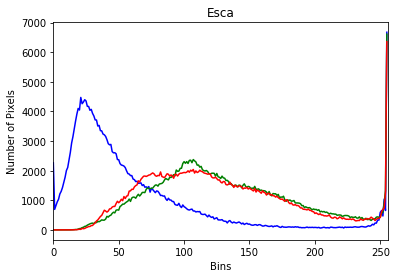

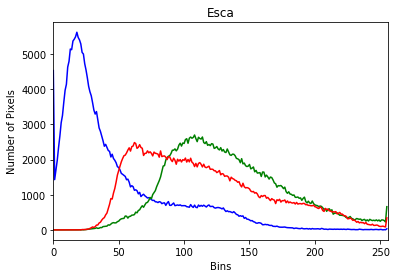

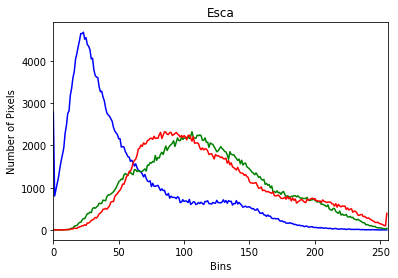

In [18]:
esca_images_hist = plot_color_histogram(path= '../datasetWS_DvsEvsHvsM_512-512_git/training_set/esca/', title='Esca')

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


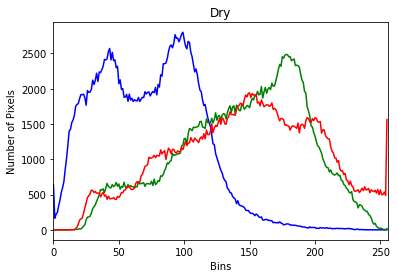

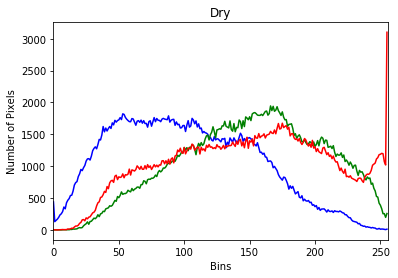

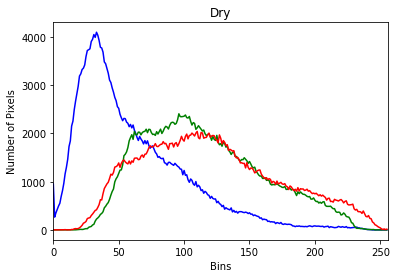

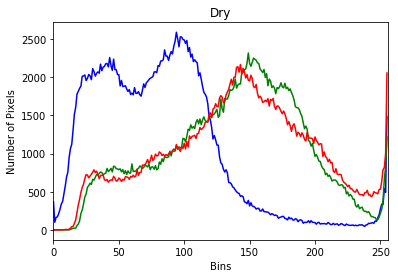

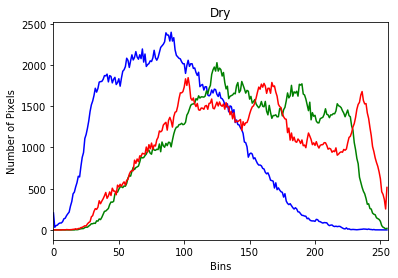

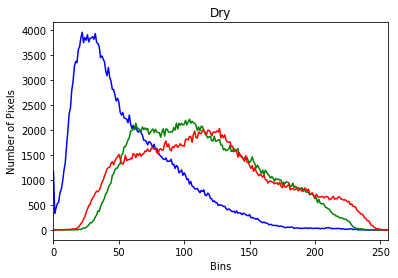

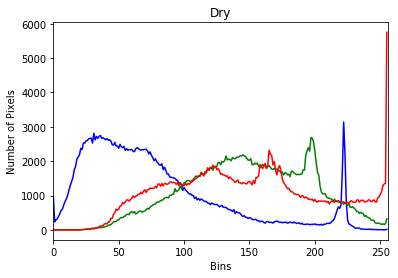

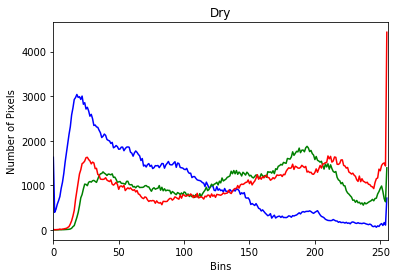

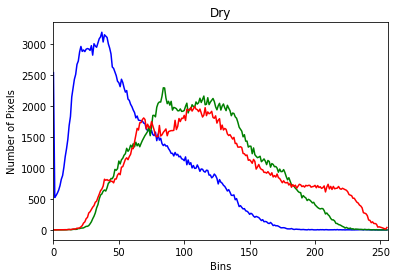

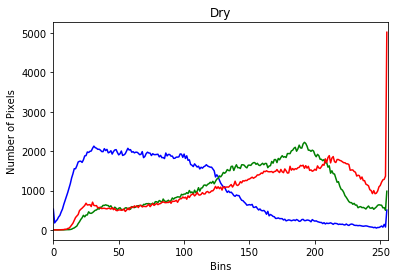

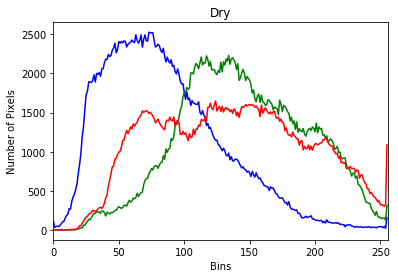

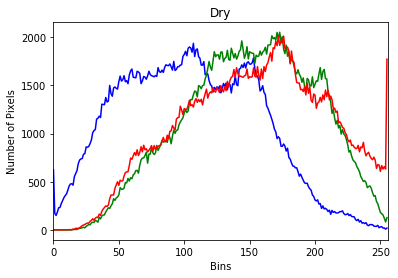

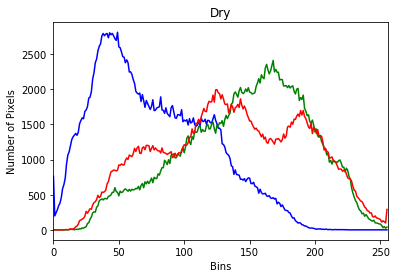

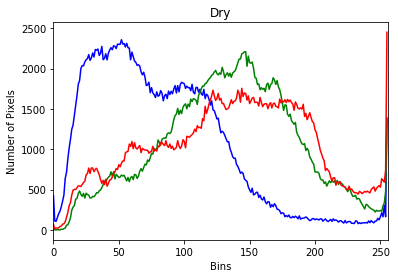

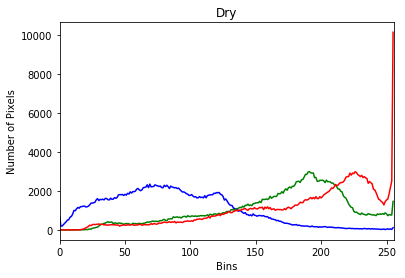

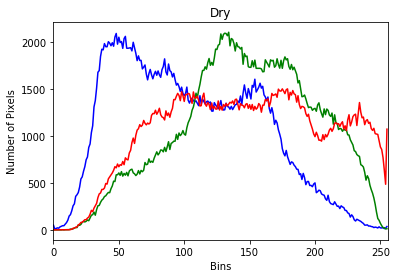

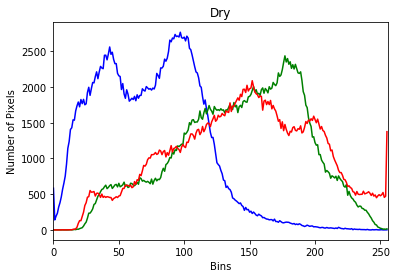

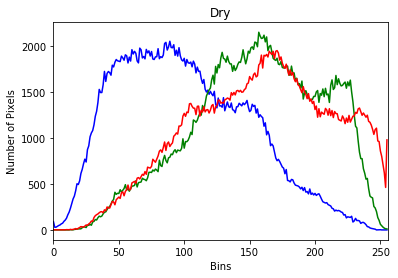

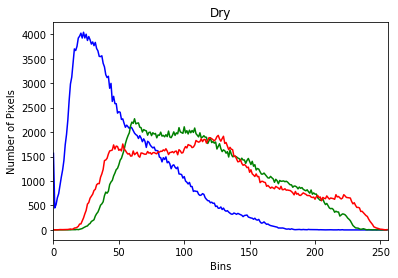

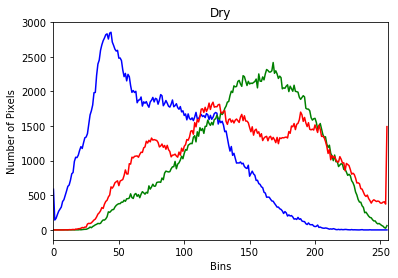

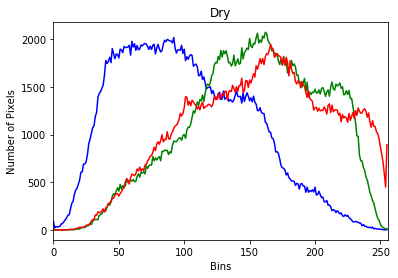

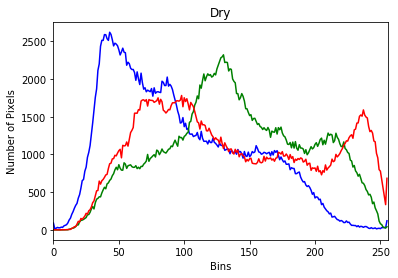

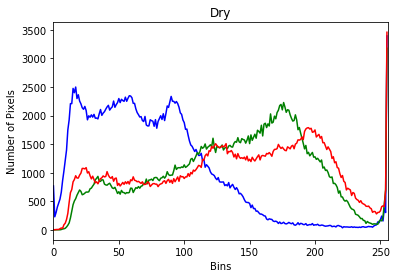

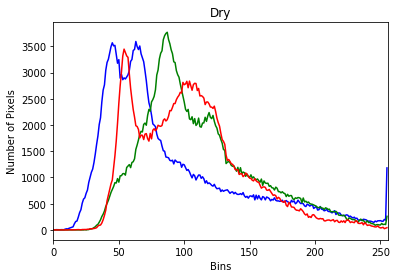

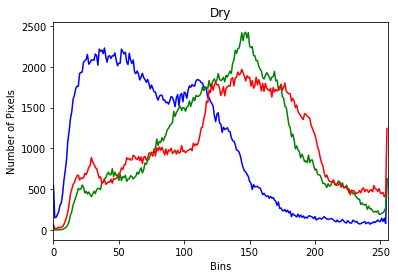

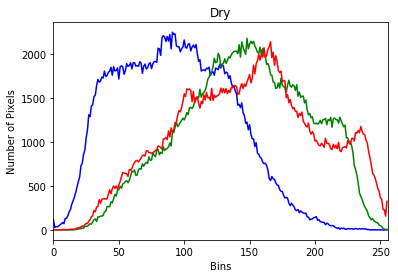

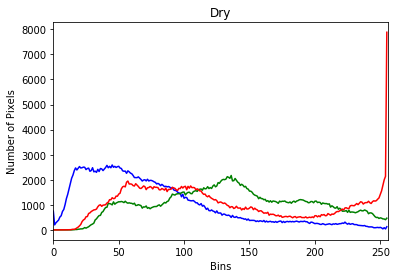

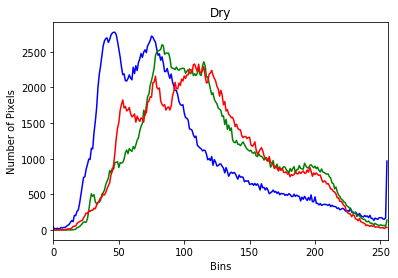

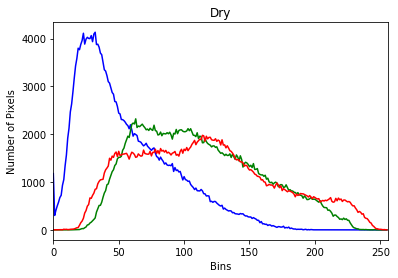

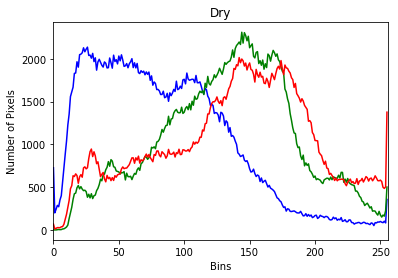

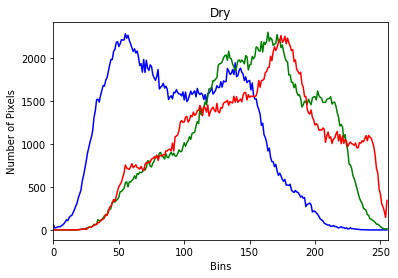

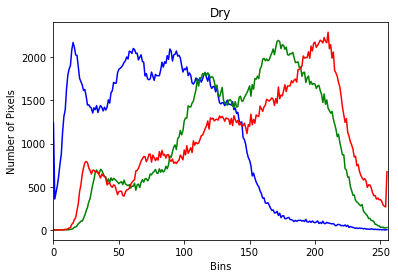

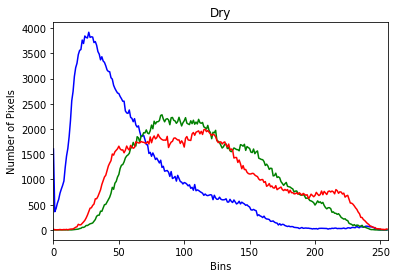

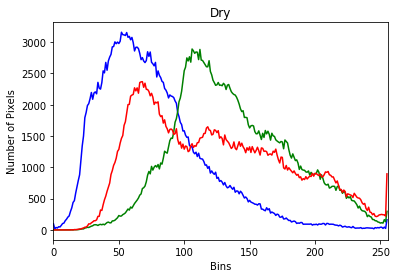

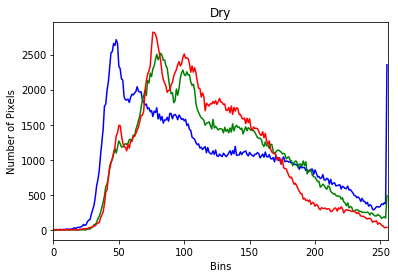

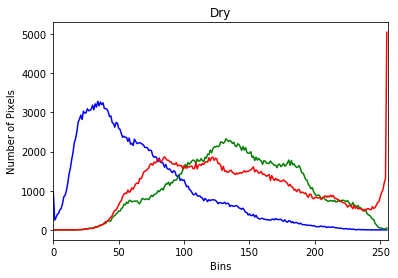

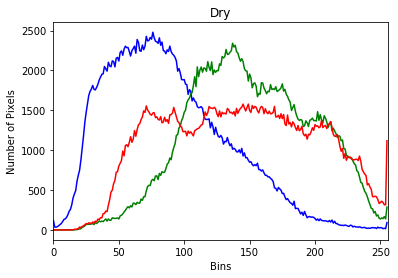

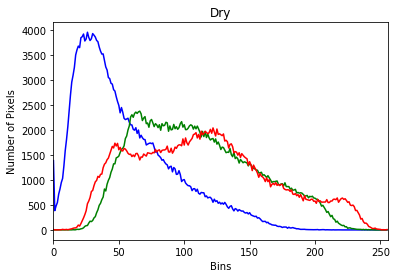

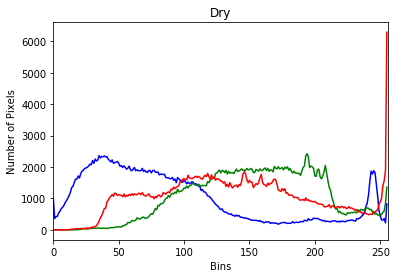

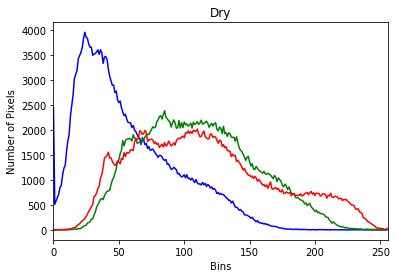

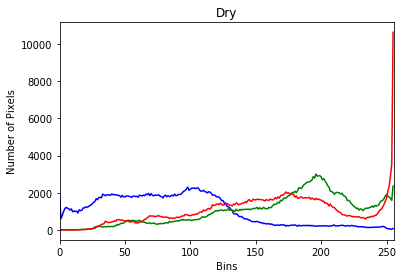

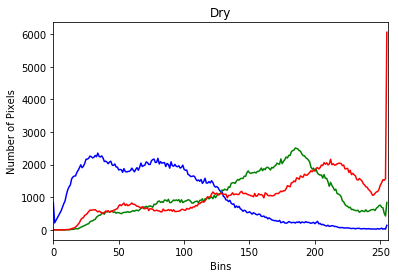

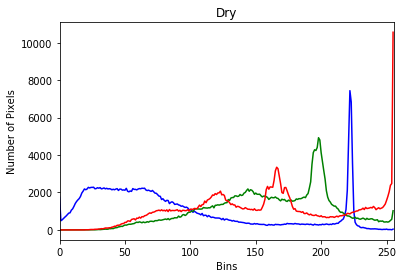

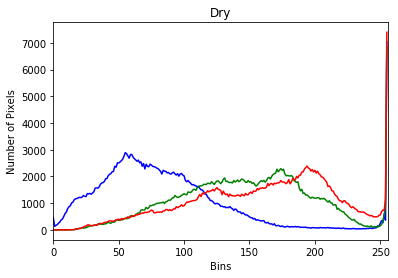

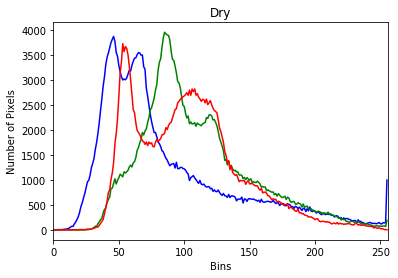

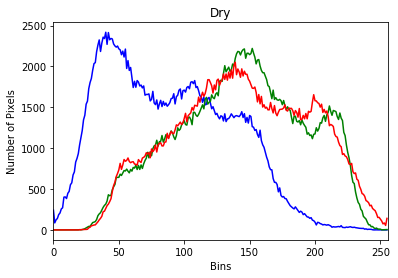

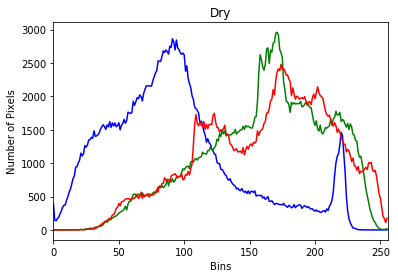

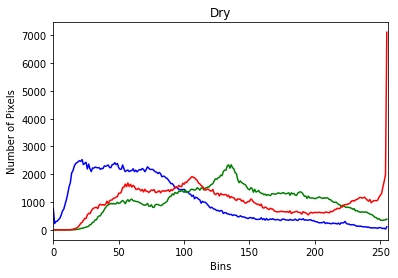

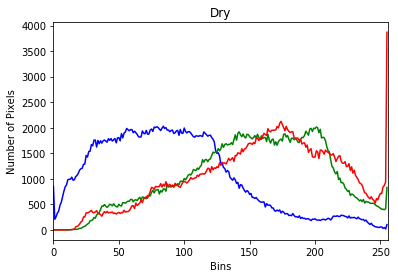

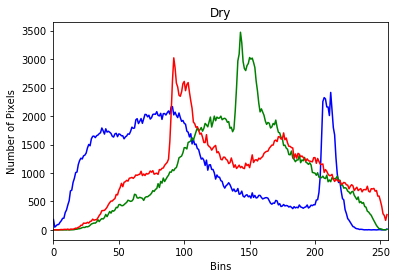

In [19]:
dry_images_hist = plot_color_histogram(path= '../datasetWS_DvsEvsHvsM_512-512_git/training_set/dry/', title='Dry')

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


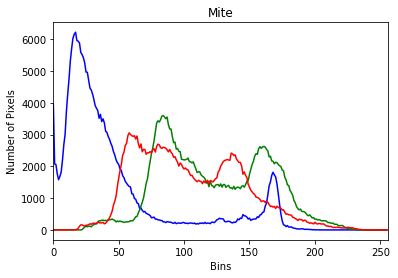

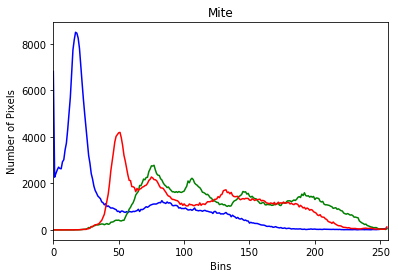

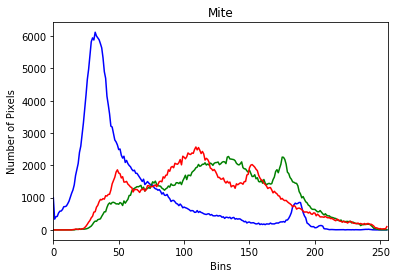

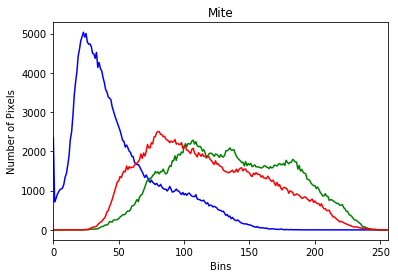

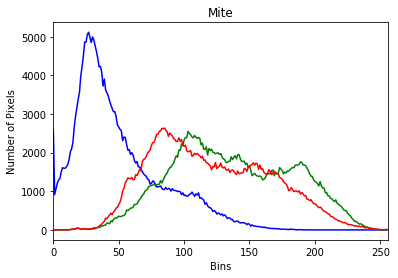

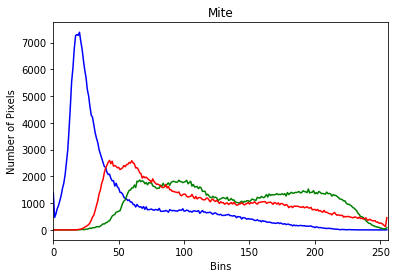

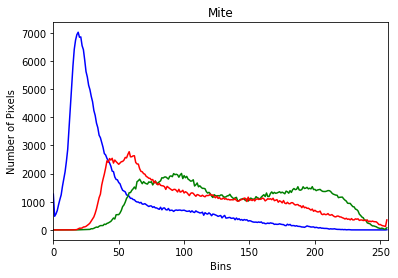

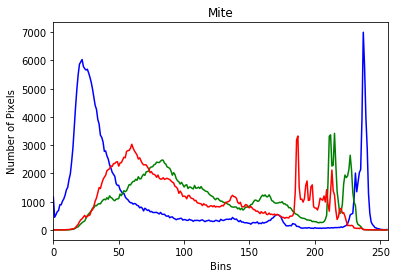

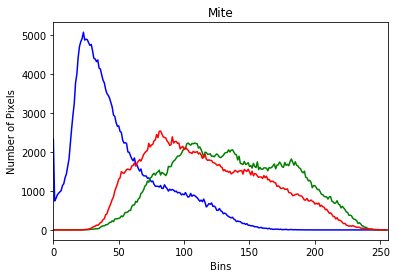

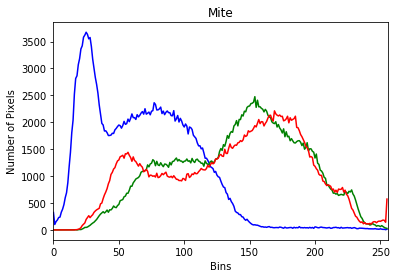

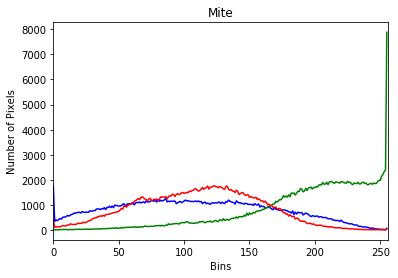

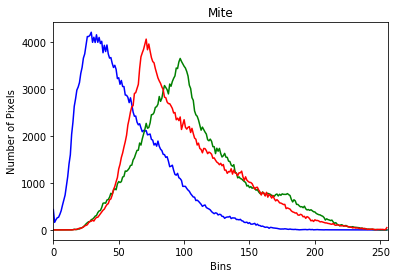

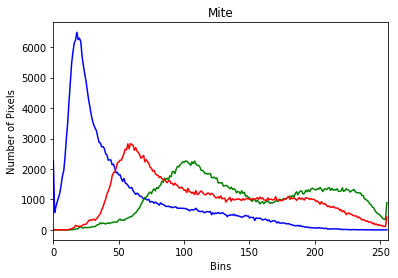

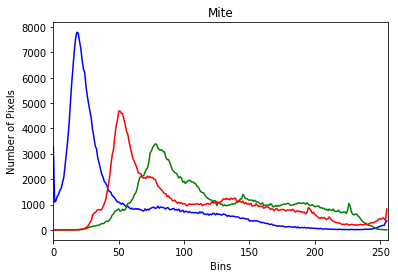

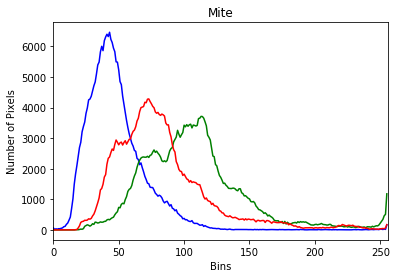

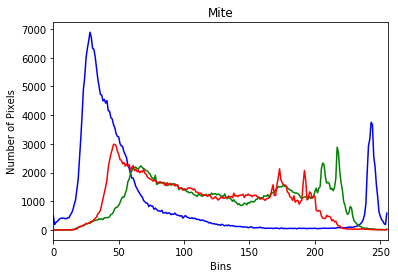

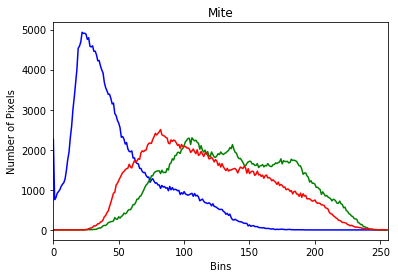

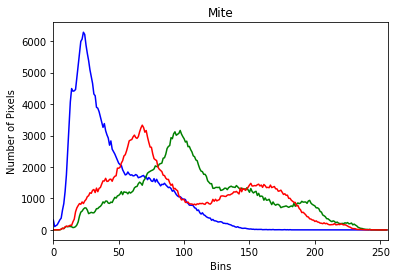

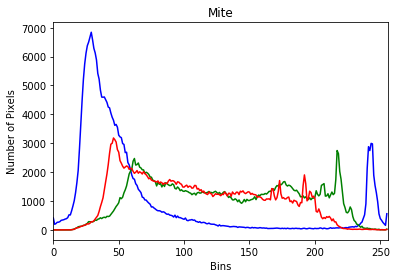

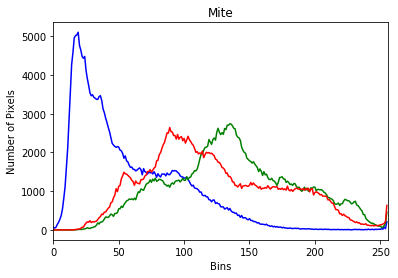

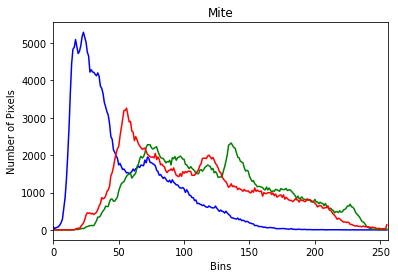

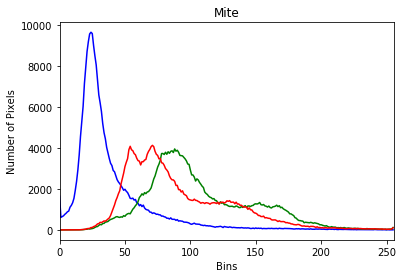

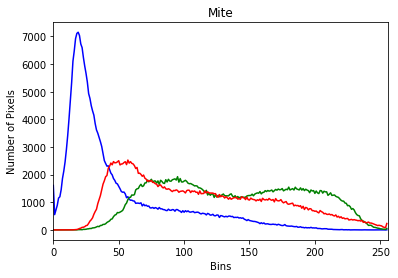

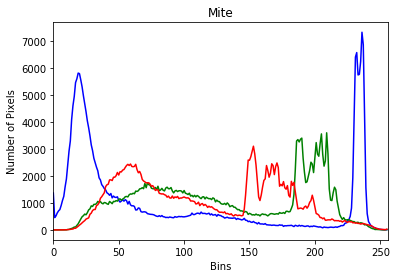

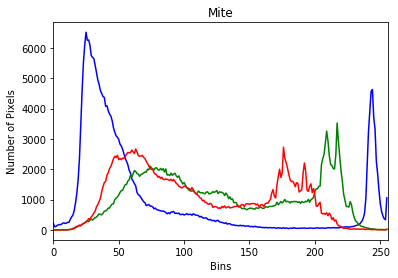

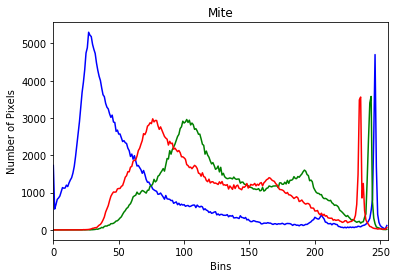

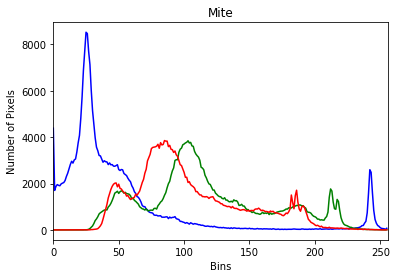

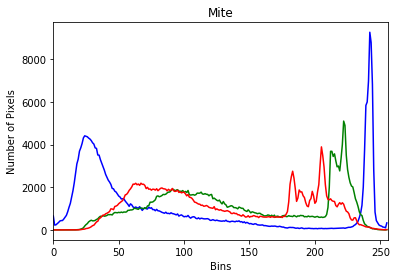

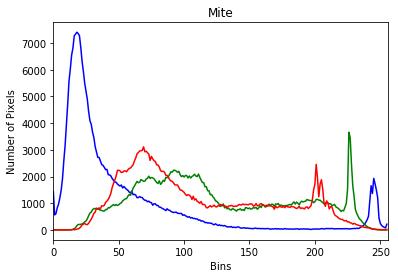

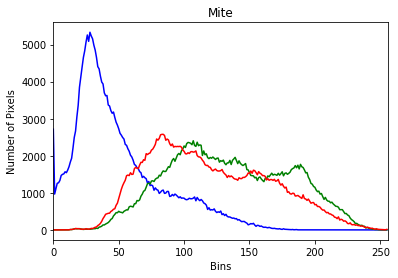

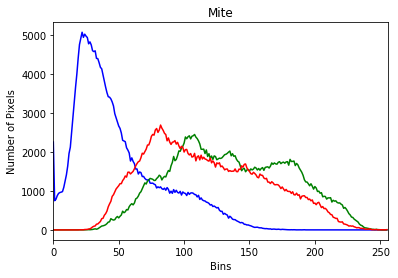

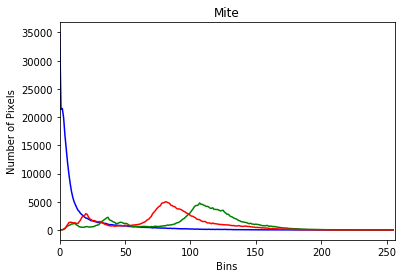

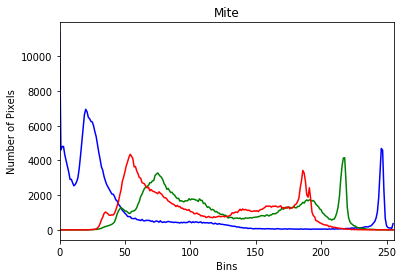

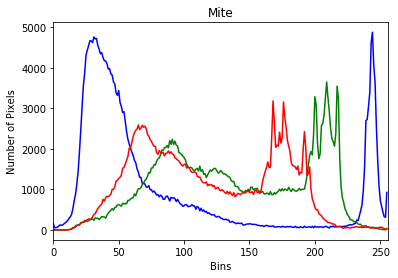

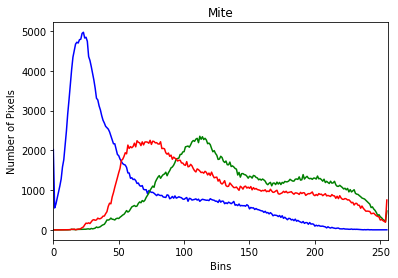

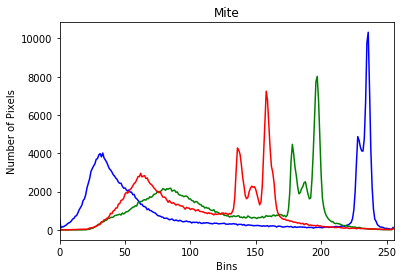

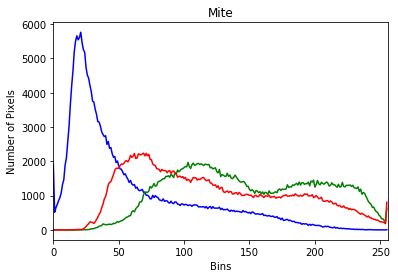

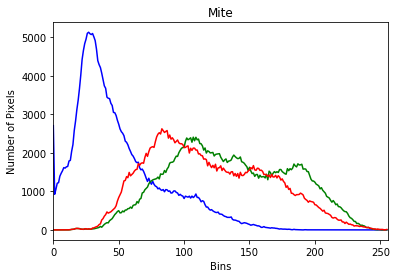

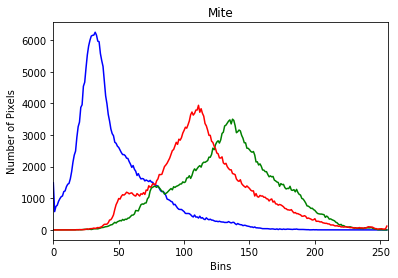

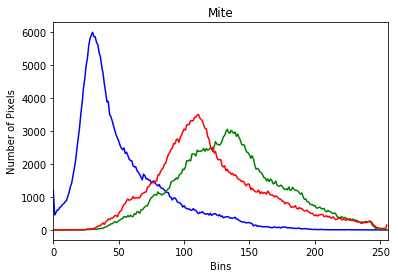

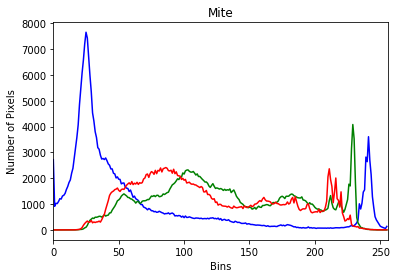

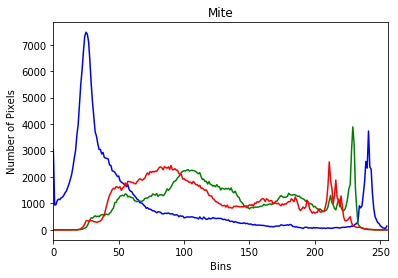

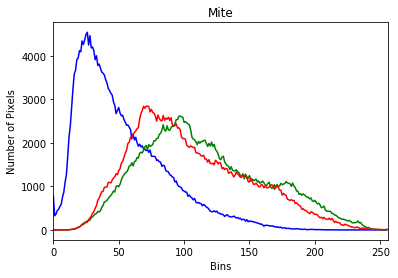

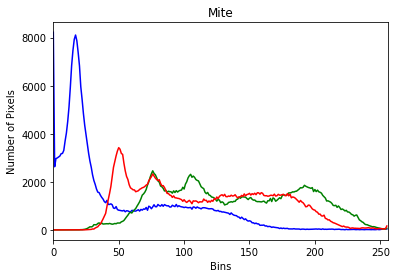

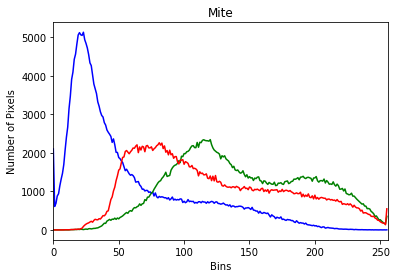

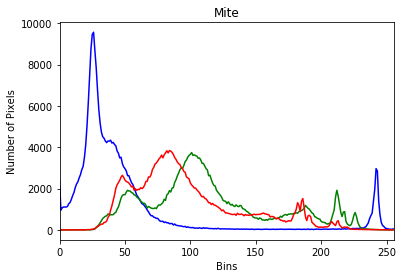

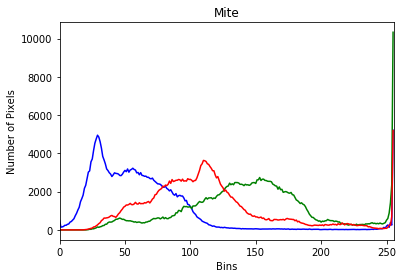

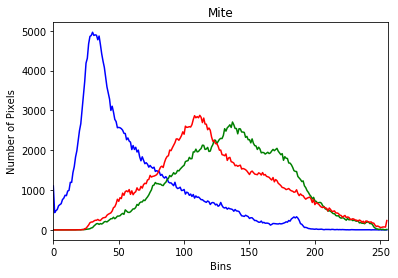

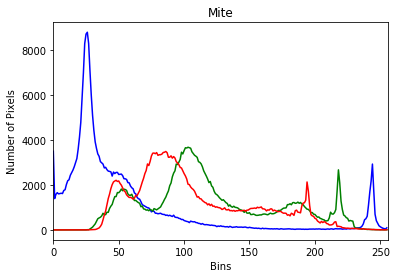

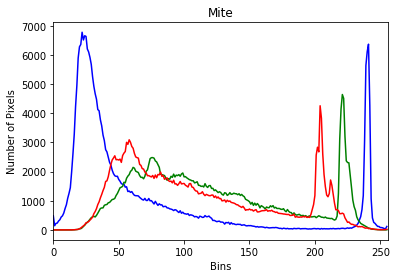

In [20]:
mite_images_hist = plot_color_histogram(path= '../datasetWS_DvsEvsHvsM_512-512_git/training_set/mite/', title='Mite')

### 4.3.1 Create the histogram using bins.

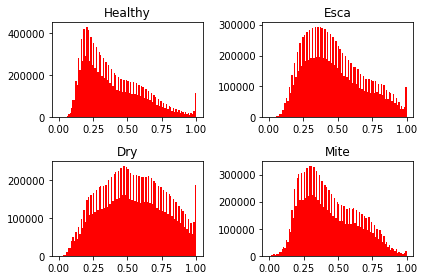

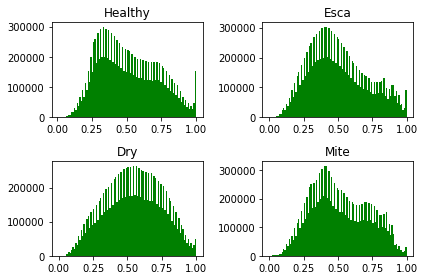

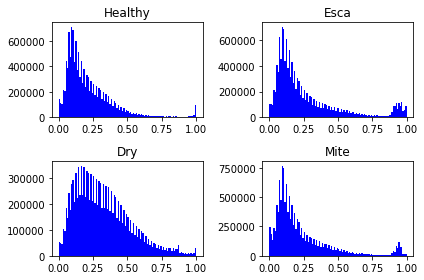

In [21]:
colors = {0: 'r', 1: 'g', 2: 'b'}
for channel, color in colors.items():
    fig2 = plt.figure()
    fig2.add_subplot(221)
    plt.hist(healthy_train[:,:,:,channel].ravel(), bins=100, color=color)
    plt.title('Healthy')
    fig2.add_subplot(222)
    plt.hist(esca_train[:,:,:,channel].ravel(), bins=100, color=color)
    plt.title('Esca')
    fig2.add_subplot(223)
    plt.hist(dry_train[:,:,:,channel].ravel(), bins=100, color=color)
    plt.title('Dry')
    fig2.add_subplot(224)
    plt.hist(mite_train[:,:,:,channel].ravel(), bins=100, color=color)
    plt.title('Mite')        
    fig2.tight_layout()
    plt.show()

### 4.3.2 Plot histogram after scaling values into the same range.

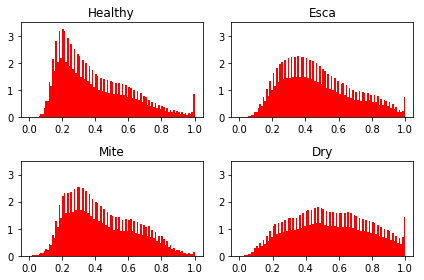

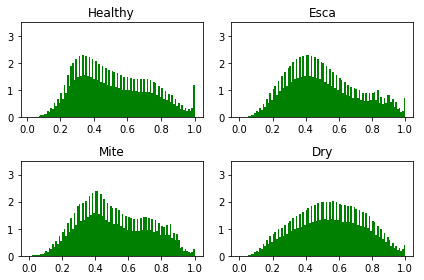

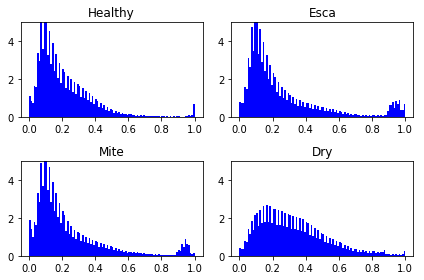

In [22]:
def plot_hists(nbins=100):
    colors = {0: 'r', 1: 'g', 2: 'b'}
    for channel, color in colors.items():
        if color in ['r', 'g']:
            ymax = 3.5
        else:
            ymax = 5
        fig2 = plt.figure()
        fig2.add_subplot(221)
        plt.hist(healthy_train[:,:,:,channel].ravel(), bins=nbins, color=color, density=True)
        plt.ylim(0,ymax)
        plt.title('Healthy')
        fig2.add_subplot(222)
        plt.hist(esca_train[:,:,:,channel].ravel(), bins=nbins, color=color, density=True)
        plt.ylim(0,ymax)
        plt.title('Esca')
        fig2.add_subplot(223)
        plt.hist(mite_train[:,:,:,channel].ravel(), bins=nbins, color=color, density=True)
        plt.ylim(0,ymax)
        plt.title('Mite')
        fig2.add_subplot(224)
        plt.hist(dry_train[:,:,:,channel].ravel(), bins=nbins, color=color, density=True)
        plt.ylim(0,ymax)
        plt.title('Dry')
        fig2.tight_layout()
        plt.show()

plot_hists()

Insights:

1, The higher intensity of red color is more frequent for Esca, Mite and Dry classes, because images from these classes contain more brown and yellow colors.

2, The lower intensity of green colors is more frequent for Healthy, Esca and Mite classes compare to Dry class.

3, Images in Dry class contain a lot of yellow and light brown colors which is a combination of high intensity of red and green color.

4, The high intensity of blue is not very frequented.

## 4.4 Create a dataframe 

In [23]:
def append_to_df(img_array, df, label):
    for image in img_array:
        hist_b = np.histogram(image[:,:,0], bins=30, density=True, range=(0,1))[0]
        hist_g = np.histogram(image[:,:,1], bins=30, density=True, range=(0,1))[0]
        hist_r = np.histogram(image[:,:,2], bins=30, density=True, range=(0,1))[0]
        hist = np.append(np.append(hist_r, hist_g), hist_b)
        df = df.append({'hist_data': hist, 'label': label}, ignore_index=True)
    return df

In [24]:
data = pd.DataFrame(columns=['hist_data', 'label'])
data = append_to_df(dry_train, data,0)
data = append_to_df(dry_test, data,0)
data = append_to_df(esca_train, data,1)
data = append_to_df(esca_test, data,1)
data = append_to_df(healthy_train, data,2)
data = append_to_df(healthy_test, data,2)
data = append_to_df(mite_train, data,3)
data = append_to_df(mite_test, data,3)

In [25]:
data.head(10)

hist_data label
0  [0.44116973877, 1.21204376221, 1.89765930176, ...     0
1  [0.253944396973, 0.47046661377, 0.934181213379...     0
2  [0.63102722168, 1.64737701416, 3.27060699463, ...     0
3  [0.282096862793, 0.912895202637, 1.93943023682...     0
4  [0.0947570800781, 0.257949829102, 0.8288955688...     0
5  [0.771560668945, 2.15309143066, 3.80550384521,...     0
6  [0.52677154541, 1.13182067871, 2.3539352417, 2...     0
7  [0.884170532227, 2.04528808594, 3.00762176514,...     0
8  [0.787811279297, 1.92970275879, 3.0252456665, ...     0
9  [0.40225982666, 1.03912353516, 1.79088592529, ...     0

# 5. Description of the dataset

In [26]:
# column names
column_names = data.columns
column_names

Index(['hist_data', 'label'], dtype='object')

In [27]:
# dataset shape
data.shape

(248, 2)

In [28]:
#summary of numerical columns
data.describe(percentiles=None, include=None, exclude=None)

hist_data  label
count                                                 248    248
unique                                                248      4
top     [0.311050415039, 1.03809356689, 1.87614440918,...      3
freq                                                    1     62

In [29]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 2 columns):
hist_data    248 non-null object
label        248 non-null object
dtypes: object(2)
memory usage: 4.0+ KB


In [30]:
# null values check
data.isnull().sum()

hist_data    0
label        0
dtype: int64

There are no null values in our dataset.

## 5.1 Output variable 

Classes distribution.

In [31]:
# number of records in each class
data['label'].value_counts()

3    62
2    62
1    62
0    62
Name: label, dtype: int64

The dataset is balanced.

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


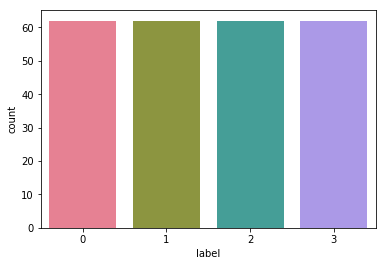

In [32]:
# Classes distribution plot
sns.countplot(x='label', data=data, palette='husl')
plt.show()